## Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Visualisation

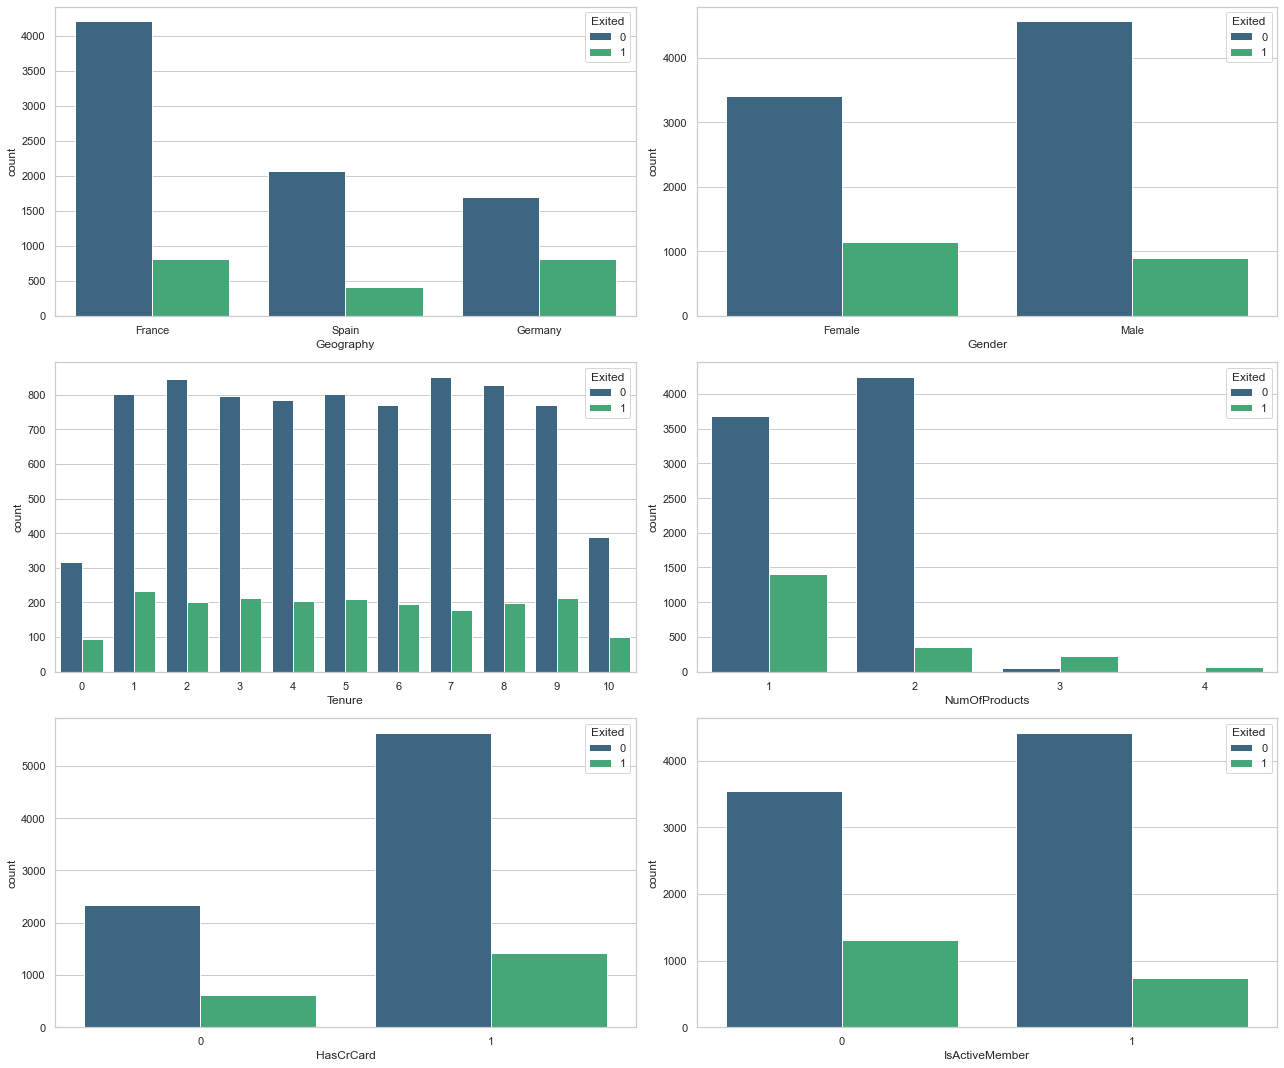

In [6]:
f, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = data, palette = "viridis", ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = data, palette = "viridis", ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = data, palette = "viridis", ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = data, palette = "viridis", ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = data, palette = "viridis", ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = data, palette = "viridis", ax = ax[2][1])

plt.tight_layout()
plt.show()

- Majority of the customers are from france, but most customers which churned are from germany.
- Female customers churning have greater proportion than male
- Churning rate is high between 1 to 9 tenures.
- Majority of the customers have 1 or 2 products and most customers which churned are having 1 products.
- Majority of customers that churned are those with credit cards.
- The inactive members have a greater churn and the overall proportion of inactive members is also very high.

**Correlation Matrix**

<AxesSubplot:>

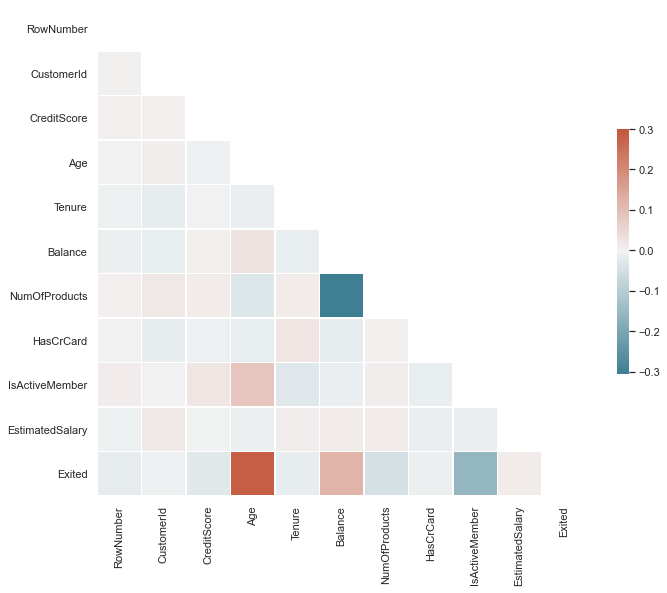

In [7]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
x = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

## Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:,2])

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [11]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## Splitting dataset into training and test set

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Model training and evaluating

In [14]:
ann = tf.keras.models.Sequential()

In [15]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [16]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
model = ann.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.3, validation_data = (x_test, y_test))

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.6397 - accuracy: 0.6646 - val_loss: 0.5427 - val_accuracy: 0.7958
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7961 - val_loss: 0.4869 - val_accuracy: 0.7958
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7961 - val_loss: 0.4675 - val_accuracy: 0.7958
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7961 - val_loss: 0.4583 - val_accuracy: 0.7958
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.7961 - val_loss: 0.4504 - val_accuracy: 0.7958
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7961 - val_loss: 0.4442 - val_accuracy: 0.7958
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7962 - val_loss: 0.4386 - val_accuracy: 0.7962

Epoch 58/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8620 - val_loss: 0.3592 - val_accuracy: 0.8575
Epoch 59/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8632 - val_loss: 0.3569 - val_accuracy: 0.8567
Epoch 60/100
175/175 [==============================] - 1s 3ms/step - loss: 0.3312 - accuracy: 0.8639 - val_loss: 0.3580 - val_accuracy: 0.8562
Epoch 61/100
175/175 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8609 - val_loss: 0.3573 - val_accuracy: 0.8600
Epoch 62/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8636 - val_loss: 0.3564 - val_accuracy: 0.8571
Epoch 63/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8634 - val_loss: 0.3566 - val_accuracy: 0.8583
Epoch 64/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8609 - val_loss: 0.3561 - val_accuracy:

In [20]:
y_pred = ann.predict(x_test)
y_pred = y_pred > 0.5
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: {0:.2f}%'.format(100 * accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[1520   75]
 [ 187  218]]
Accuracy: 86.90%
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.54      0.62       405

    accuracy                           0.87      2000
   macro avg       0.82      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



## Visualising ANN's Loss and Accuracy

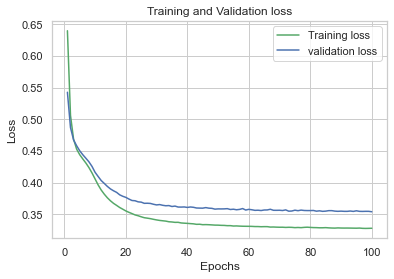

In [22]:
loss_train = model.history['loss']
loss_val = model.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

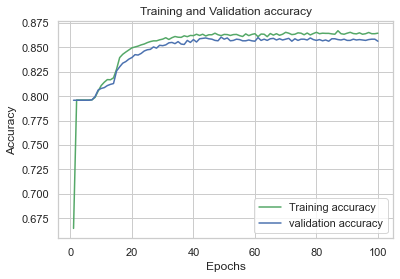

In [23]:
loss_train = model.history['accuracy']
loss_val = model.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()